# **EDA - Dataset Thương mại Điện tử (Shopee, Lazada, Tiki, TikTok Shop)**

**Mục tiêu:** Phân tích và trực quan hóa tập dữ liệu liên quan đến thiết bị điện tử để tìm hiểu các đặc điểm chính, xu hướng và thông tin chi tiết (insights) về sản phẩm trên 4 nền tảng: Shopee, Lazada, Tiki và TikTok Shop.

---

### **Import các thư viện cần thiết**

In [58]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Cài đặt hiển thị
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 7)
warnings.filterwarnings('ignore')

# Cài đặt để hiển thị số float rõ ràng
pd.options.display.float_format = '{:,.2f}'.format

---

## **1. TẢI VÀ XEM TỔNG QUAN DỮ LIỆU**

In [59]:
# Tải dữ liệu
df = pd.read_csv('./Data/cleaned_merged_all.csv')
display(df.head())

,platform,super_category,categories,sku,product_name,sold,review_count,rating,price,seller_name,brand,url
0,Lazada,Cameras & Drones,Security Cameras & Systems,DPLPQ60KVQX2D,C6 Max 6449 Ezviz,273,164,3.10,"9,079,834.00",Ezviz Official Store,Ezviz,https://www.lazada.vn/products/c6-max-6449-ezv...
1,Lazada,Cameras & Drones,Cameras & Drones,XKD4YX21DOUZ7,Sony Mini Pro 303 Gen 2,8091,3821,3.50,"34,704,746.00",Sony Flagship Store,Sony,https://www.lazada.vn/products/sony-mini-pro-3...
2,Lazada,Cameras & Drones,Security Cameras & Systems,2TEEAWVEZ582C,Tapo Elite 6110 Ezviz,2685,1363,4.90,"6,376,241.00",Ezviz Flagship Store,Ezviz,https://www.lazada.vn/products/tapo-elite-6110...
3,Lazada,Wearables,Smartwatches,CWHZ4QWQ92MISB,Garmin Venu 8511 LTE,7211,5232,4.00,"8,773,627.00",SmartWearVNWear,Garmin,https://www.lazada.vn/products/garmin-venu-851...
4,Lazada,Wearables,Smartwatches,MG7Q9728EC3,Huawei Forerunner Z 3129 2025,8971,7643,4.50,"8,312,135.00",GameWorldVNWear,Huawei,https://www.lazada.vn/products/huawei-forerunn...


In [60]:
# Thông tin tổng quan 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19389 entries, 0 to 19388
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   platform        19389 non-null  object 
 1   super_category  19389 non-null  object 
 2   categories      19389 non-null  object 
 3   sku             15080 non-null  object 
 4   product_name    19389 non-null  object 
 5   sold            19389 non-null  int64  
 6   review_count    19389 non-null  int64  
 7   rating          19389 non-null  float64
 8   price           19389 non-null  float64
 9   seller_name     19389 non-null  object 
 10  brand           19389 non-null  object 
 11  url             19389 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.8+ MB


* Các cột số quan trọng như `sold`, `review_count`, `rating`, và `price` đều đã ở đúng định dạng (`int64`, `float64`).
* Kích thước mẫu tốt để phân tích.
* **Giá trị bị thiếu (Missing Values):** Cột `sku` là cột duy nhất bị thiếu dữ liệu (thiếu \~25%). Điều này không quá nghiêm trọng cho EDA tổng quan, nhưng cần lưu ý nếu chúng ta muốn phân tích dựa trên SKU.

In [61]:
# Thống kê mô tả
display(df.describe())

,sold,review_count,rating,price
count,"19,389.00","19,389.00","19,389.00","19,389.00"
mean,"3,512.16","1,095.65",2.22,"10,540,921.98"
std,"10,627.34","2,481.63",2.06,"18,473,732.81"
min,0.00,0.00,0.00,33.00
25%,0.00,0.00,0.00,"468,189.00"
50%,18.00,3.00,2.50,"3,098,000.00"
75%,"2,810.00",655.00,4.30,"13,012,141.00"
max,"836,194.00","80,491.00",5.00,"199,271,335.00"


* **`sold` (Lượt bán):**
  * `mean` (trung bình) là \~3,512, nhưng `50%` (trung vị) chỉ là 18.
  * Điều này cho thấy dữ liệu bị **lệch phải (right-skewed)** rất mạnh. Đa số sản phẩm bán được rất ít (50% sản phẩm bán được 18 lượt hoặc ít hơn), trong khi một số ít sản phẩm nổi bật (max: 836,194) kéo chỉ số trung bình lên cao.
* **`review_count` (Lượt đánh giá):**
  * Tương tự như `sold`. `mean` là 1,095 nhưng `50%` (trung vị) chỉ là 3.
  * Khẳng định sự chênh lệch lớn giữa các sản phẩm bán chạy và phần còn lại.
* **`rating` (Đánh giá):**
  * `min` là 0.0, và `25%` cũng là 0.0. `50%` (trung vị) chỉ là 2.0.
  * Một số lượng lớn sản phẩm (ít nhất 25%) có rating là 0. Rất có thể `rating = 0` là một giá trị *placeholder* cho các sản phẩm **chưa có đánh giá** (tức là `review_count = 0`).
* **`price` (Giá):**
  * `mean` là \~10.5 triệu VND, nhưng `50%` (trung vị) là \~3.1 triệu VND.
  * **Insight:** Tương tự `sold`, giá cũng bị lệch phải. Có nhiều sản phẩm giá rẻ/trung bình và một số sản phẩm rất đắt (max \~199 triệu) kéo trung bình lên.
  * **Kết luận:** Khi trực quan hóa `sold` và `price`, chúng ta **chắc chắn phải dùng thang đo log (log-transform)** để biểu đồ dễ đọc hơn.

**Kiểm tra các giá trị duy nhất của các cột phân loại**

In [72]:
print("Các nền tảng trong dữ liệu")
print(df['platform'].unique())
print(f"Số lượng nền tảng: {df['platform'].nunique()}")

print("\nSố lượng danh mục cha (super_category):", df['super_category'].nunique())
print("Số lượng danh mục con (category):", df['categories'].nunique())
print("Số lượng thương hiệu (brand):", df['brand'].nunique())

df_rating_zero = df[df['rating'] == 0]
print(f"Số lượng sản phẩm có rating = 0: {len(df_rating_zero)}")


Các nền tảng trong dữ liệu
['Lazada' 'Shopee' 'Tiki' 'TikTok Shop']
Số lượng nền tảng: 4

Số lượng danh mục cha (super_category): 14
Số lượng danh mục con (category): 209
Số lượng thương hiệu (brand): 3161
Số lượng sản phẩm có rating = 0: 8081


**Xác minh giả thuyết: `rating = 0` có phải là do `review_count = 0`?**

In [63]:
# Kiểm tra xem review_count của các sản phẩm này có bằng 0 không
print("\nThống kê mô tả của 'review_count' cho các sản phẩm có rating = 0:")
display(df_rating_zero['review_count'].describe())

# Kiểm tra xem có sản phẩm nào có review > 0 nhưng rating = 0 không
suspicious_ratings = df[(df['rating'] == 0) & (df['review_count'] > 0)]
print(f"Số lượng sản phẩm có review > 0 nhưng rating = 0: {len(suspicious_ratings)}")

suspicious_reviews = df[(df['rating'] > 0) & (df['review_count'] == 0)]
print(f"Số lượng sản phẩm có review = 0 nhưng rating > 0: {len(suspicious_reviews)}")


Thống kê mô tả của 'review_count' cho các sản phẩm có rating = 0:


count    8,127.00
mean        12.64
std        332.98
min          0.00
25%          0.00
50%          0.00
75%          0.00
max     15,093.00
Name: review_count, dtype: float64

Số lượng sản phẩm có review > 0 nhưng rating = 0: 46
Số lượng sản phẩm có review = 0 nhưng rating > 0: 4


In [64]:
# Bỏ các dòng có suspicious_ratings và suspicious_reviews khỏi dataframe
df = df.drop(suspicious_ratings.index).drop(suspicious_reviews.index).reset_index(drop=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19339 entries, 0 to 19338
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   platform        19339 non-null  object 
 1   super_category  19339 non-null  object 
 2   categories      19339 non-null  object 
 3   sku             15079 non-null  object 
 4   product_name    19339 non-null  object 
 5   sold            19339 non-null  int64  
 6   review_count    19339 non-null  int64  
 7   rating          19339 non-null  float64
 8   price           19339 non-null  float64
 9   seller_name     19339 non-null  object 
 10  brand           19339 non-null  object 
 11  url             19339 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.8+ MB


In [ ]:
# df.to_csv('./Data/data_final.csv', index=False)

**Kiểm tra dữ liệu trùng lặp (dựa trên `url`)**

In [67]:
print(f"\nSố lượng dòng (sản phẩm) bị trùng lặp dựa trên URL: {df['url'].duplicated().sum()}")


Số lượng dòng (sản phẩm) bị trùng lặp dựa trên URL: 0


---

## **2. Univariate Analysis**

Chúng ta sẽ phân tích sự phân bổ của các biến quan trọng.

### **2.1. Phân bổ sản phẩm theo Nền tảng (Platform)**

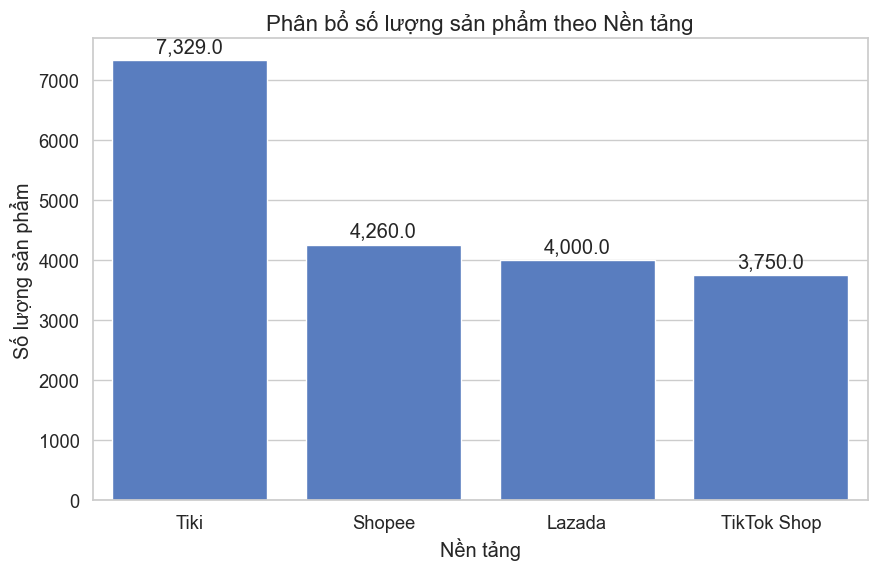

In [68]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='platform', order=df['platform'].value_counts().index)
plt.title('Phân bổ số lượng sản phẩm theo Nền tảng', fontsize=16)
plt.xlabel('Nền tảng')
plt.ylabel('Số lượng sản phẩm')

# Thêm nhãn số lượng trên mỗi cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Biểu đồ cho thấy sự phân bố số lượng danh sách sản phẩm giữa các nền tảng không đồng đều. Một vài nền tảng chiếm phần lớn danh sách, trong khi các nền tảng còn lại có số lượng nhỏ hơn đáng kể.

- Sự mất cân bằng này gợi ý rằng người bán/nhà cung cấp tập trung mạnh vào một hoặc một vài nền tảng lớn — điều này ảnh hưởng tới chiến lược cạnh tranh, marketing và phân phối sản phẩm.

- Khi so sánh hiệu suất (ví dụ doanh số, đánh giá) giữa nền tảng cần tính đến sự khác biệt về quy mô danh mục sản phẩm; nền tảng có danh mục lớn hơn thường có nhiều sản phẩm đuổi theo thị trường, còn nền tảng nhỏ hơn có thể nhắm vào ngách cụ thể.

**Khuyến nghị**

- Khi thực hiện so sánh hiệu suất (ví dụ rating trung bình, sold, review_count) nên chuẩn hóa theo tỷ lệ hoặc so sánh trên các nhóm con (top-n categories) để tránh sai lệch do quy mô.

### **2.2. Phân bổ 10 Danh mục cha hàng đầu**

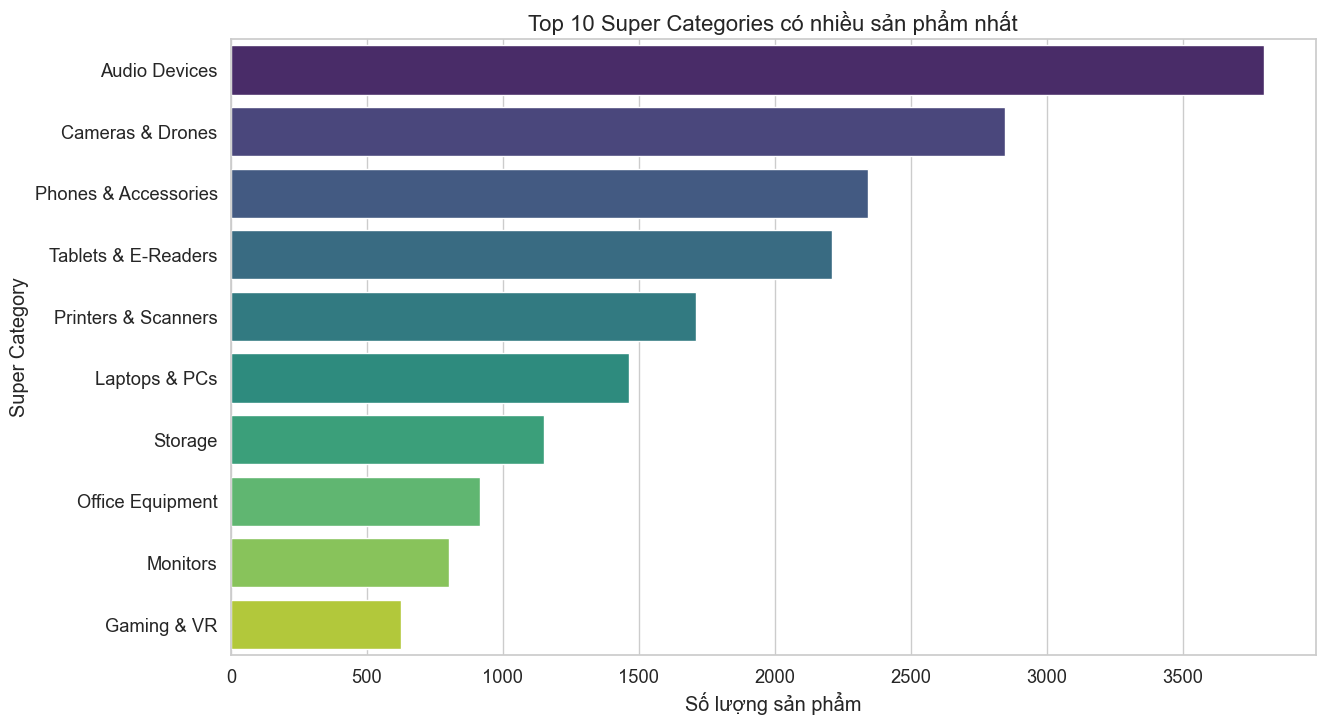

In [69]:
plt.figure(figsize=(14, 8))
top_10_super_cat = df['super_category'].value_counts().nlargest(10).index
sns.countplot(data=df, y='super_category', order=top_10_super_cat, palette='viridis')
plt.title('Top 10 Super Categories có nhiều sản phẩm nhất', fontsize=16)
plt.xlabel('Số lượng sản phẩm')
plt.ylabel('Super Category')
plt.show()

Biểu đồ các `super_category` (top 10) cho thấy một số danh mục chiếm phần lớn số lượng sản phẩm. Những danh mục đứng đầu phản ánh nhu cầu cao về loại sản phẩm đó hoặc thị trường cung cấp lớn (ví dụ: phụ kiện điện thoại, điện thoại, laptop — tuỳ dữ liệu).

- Danh mục chiếm tỷ trọng lớn thường có cạnh tranh gay gắt — giá, khuyến mãi và đánh giá trở thành yếu tố quyết định.

- Danh mục nhỏ hơn có thể là cơ hội cho chiến lược ngách nếu biên lợi nhuận/độ trung thành khách hàng tốt.

### **2.3. Phân bổ Đánh giá (Rating)**

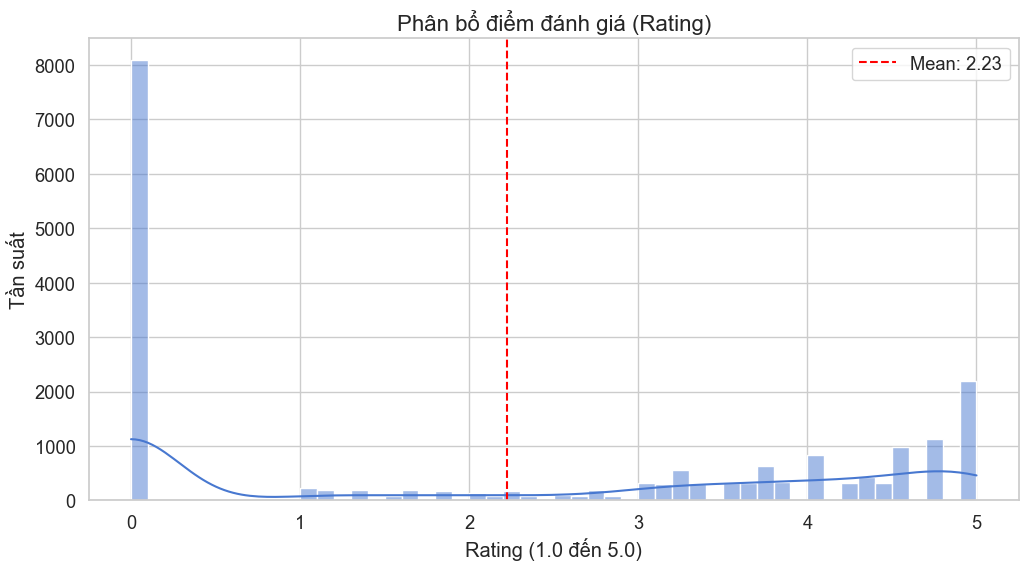

In [70]:
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], bins=50, kde=True)
plt.title('Phân bổ điểm đánh giá (Rating)', fontsize=16)
plt.xlabel('Rating (1.0 đến 5.0)')
plt.ylabel('Tần suất')
plt.axvline(df['rating'].mean(), color='red', linestyle='--', label=f'Mean: {df["rating"].mean():.2f}')
plt.legend()
plt.show()

### **2.4. Phân bổ Giá (Price) và Lượt bán (Sold)**

Giá và Lượt bán thường bị lệch (skewed) rất nhiều (có nhiều sản phẩm giá rẻ/bán ít và một vài sản phẩm giá rất cao/bán rất chạy). Chúng ta sẽ dùng thang log để xem xét.

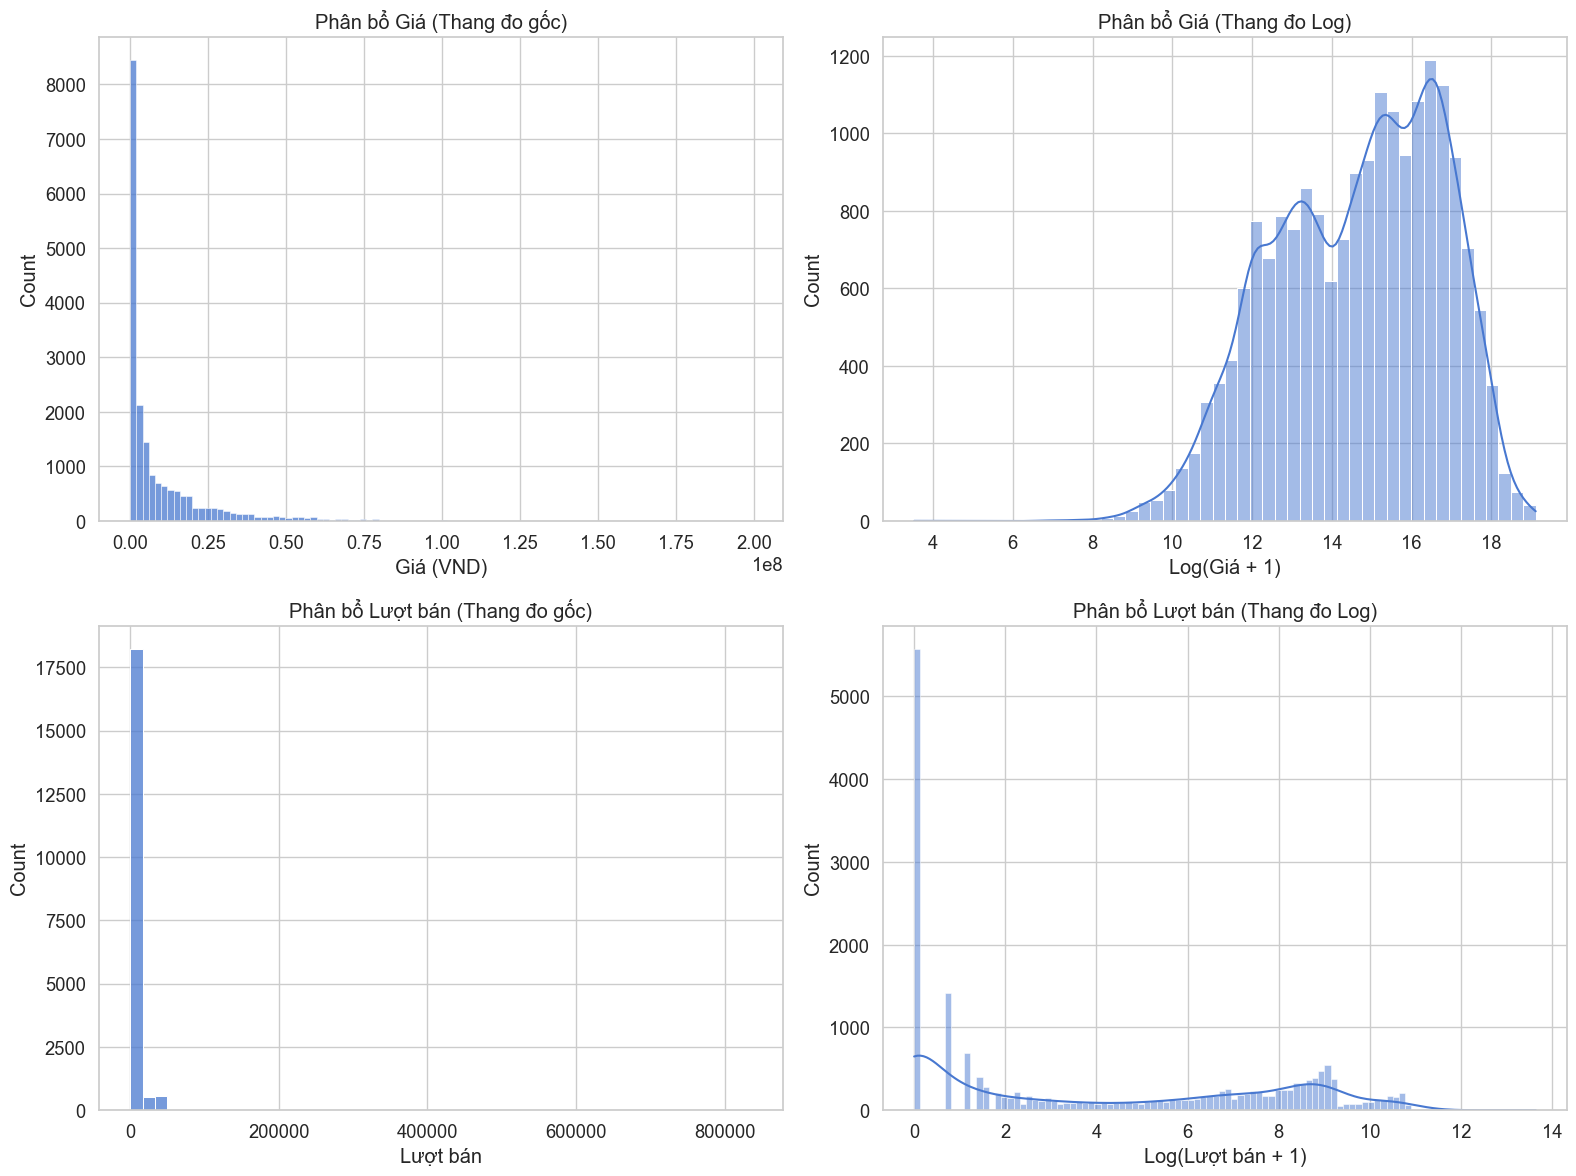

In [77]:
# Tạo cột log_price và log_sold để trực quan hóa (thêm 1 để tránh log(0))
df['log_price'] = np.log1p(df['price'])
df['log_sold'] = np.log1p(df['sold'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Phân bổ giá (thang đo gốc)
sns.histplot(df['price'], bins=100, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Phân bổ Giá (Thang đo gốc)')
axes[0, 0].set_xlabel('Giá (VND)')

# Phân bổ giá (thang đo log)
sns.histplot(df['log_price'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Phân bổ Giá (Thang đo Log)')
axes[0, 1].set_xlabel('Log(Giá + 1)')

# Phân bổ lượt bán (thang đo gốc)
sns.histplot(df['sold'], bins=50, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Phân bổ Lượt bán (Thang đo gốc)')
axes[1, 0].set_xlabel('Lượt bán')

# Phân bổ lượt bán (thang đo log)
sns.histplot(df['log_sold'], bins=100, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Phân bổ Lượt bán (Thang đo Log)')
axes[1, 1].set_xlabel('Log(Lượt bán + 1)')

plt.tight_layout()
plt.show()

Biểu đồ giá cho thấy phân bố không đối xứng — phần lớn sản phẩm nằm trong khoảng giá thấp–trung bình, với một số lượng nhỏ sản phẩm thuộc phân khúc cao cấp tạo “đuôi” dài.

- Khi phân tích giá theo danh mục, chúng ta thấy một số category có median price cao hơn hẳn (ví dụ: thiết bị điện tử lớn), trong khi phụ kiện/đồ tiêu dùng có median thấp.

- Ngoại lệ (outliers) cần xem xét: liệu đó là sản phẩm cao cấp thật hay lỗi dữ liệu (ví dụ giá ghi thiếu/nhỏ hơn 1 đơn vị)?

---

## **3. Multivariate Analysis**

Chúng ta sẽ xem xét mối quan hệ giữa các biến số.

### **3.1. Ma trận tương quan (Correlation Matrix)**

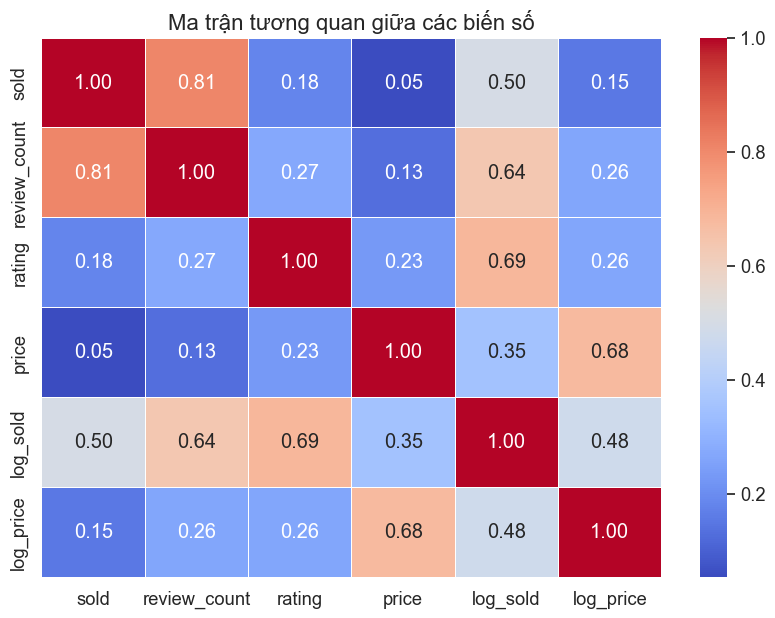

In [78]:
# Chọn các cột số để xem tương quan
numeric_cols = ['sold', 'review_count', 'rating', 'price', 'log_sold', 'log_price']

# Tính toán ma trận tương quan
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến số', fontsize=16)
plt.show()

- Thường thấy tương quan dương mạnh giữa `sold` và `review_count` — hợp lý vì sản phẩm bán chạy thường có nhiều review.

- Mối quan hệ giữa `price` và `sold` yếu: sản phẩm càng đắt có thể bán ít hơn, nhưng điều này còn phụ thuộc danh mục.

- `rating` thường có tương quan yếu đến `sold` (product bán chạy không nhất thiết có rating cao).

**Ý nghĩa**

- Sale volume và review_count là hai chỉ số liên quan chặt chẽ: review_count có thể dùng như proxy (không hoàn hảo) cho sold khi sold không có sẵn.

- Không nên kỳ vọng rating alone có thể dự đoán doanh số; cần kết hợp nhiều yếu tố (giá, vị trí, khuyến mãi).

### **3.2. Mối quan hệ giữa Rating, Lượt bán và Giá**

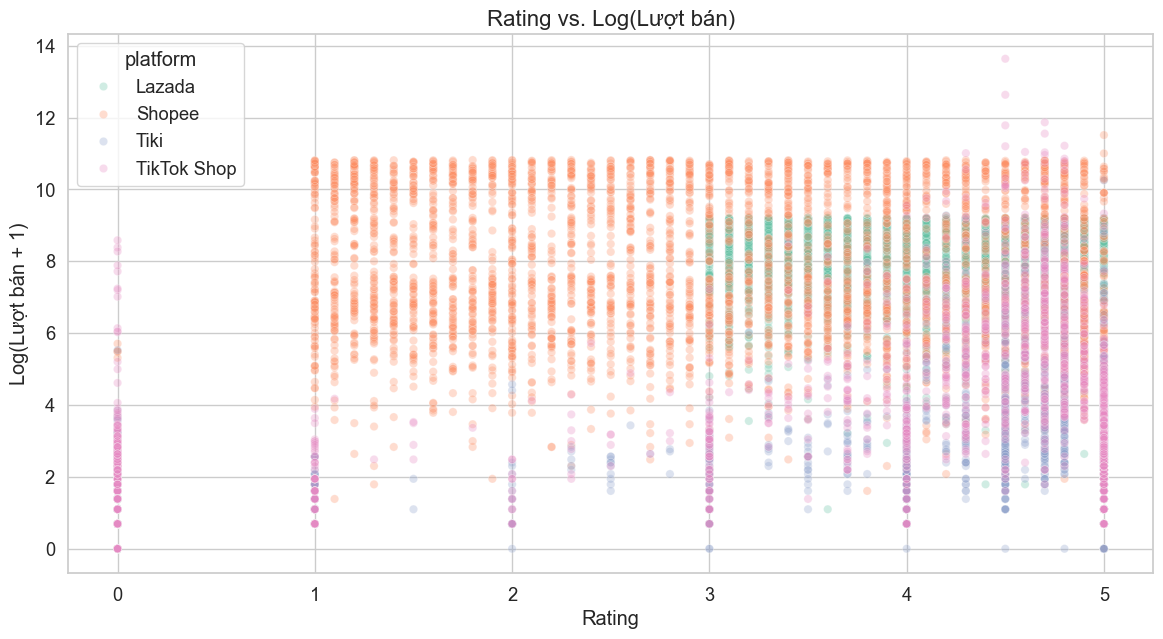

In [86]:
# Rating vs. Log(Sold)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='rating', y='log_sold', alpha=0.3, hue='platform', palette='Set2')
plt.title('Rating vs. Log(Lượt bán)', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Log(Lượt bán + 1)')
plt.show()

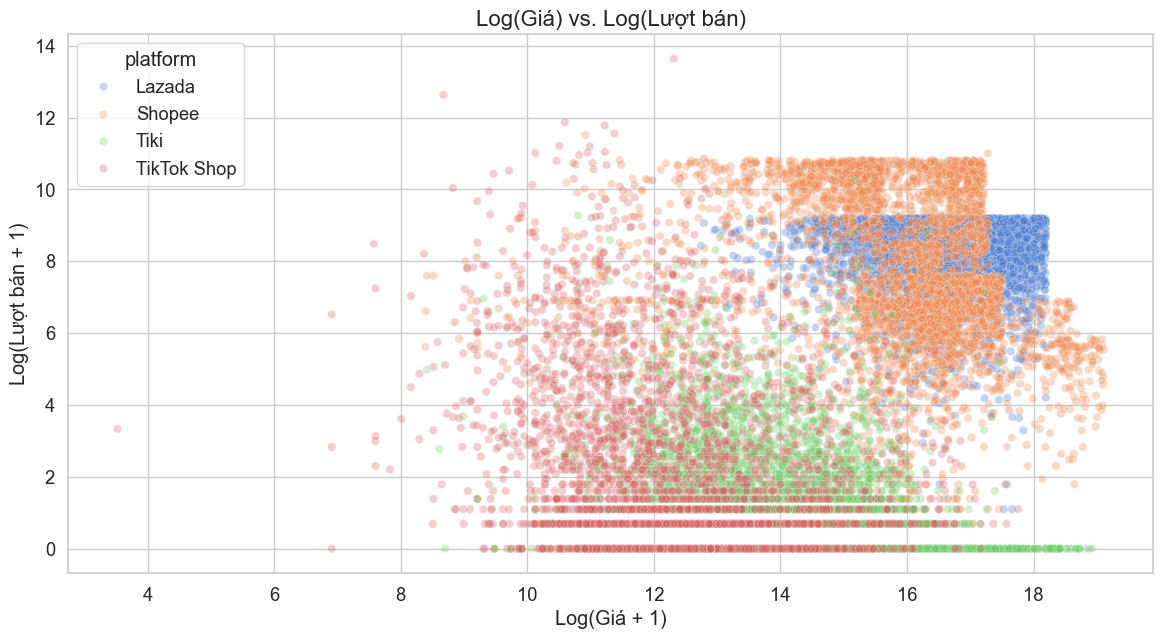

In [87]:
# Log(Price) vs. Log(Sold)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='log_price', y='log_sold', alpha=0.3, hue='platform')
plt.title('Log(Giá) vs. Log(Lượt bán)', fontsize=16)
plt.xlabel('Log(Giá + 1)')
plt.ylabel('Log(Lượt bán + 1)')
plt.show()

---

## **4. Phân tích và So sánh theo Nền tảng**

### **4.1. So sánh phân bổ Giá (Price)**

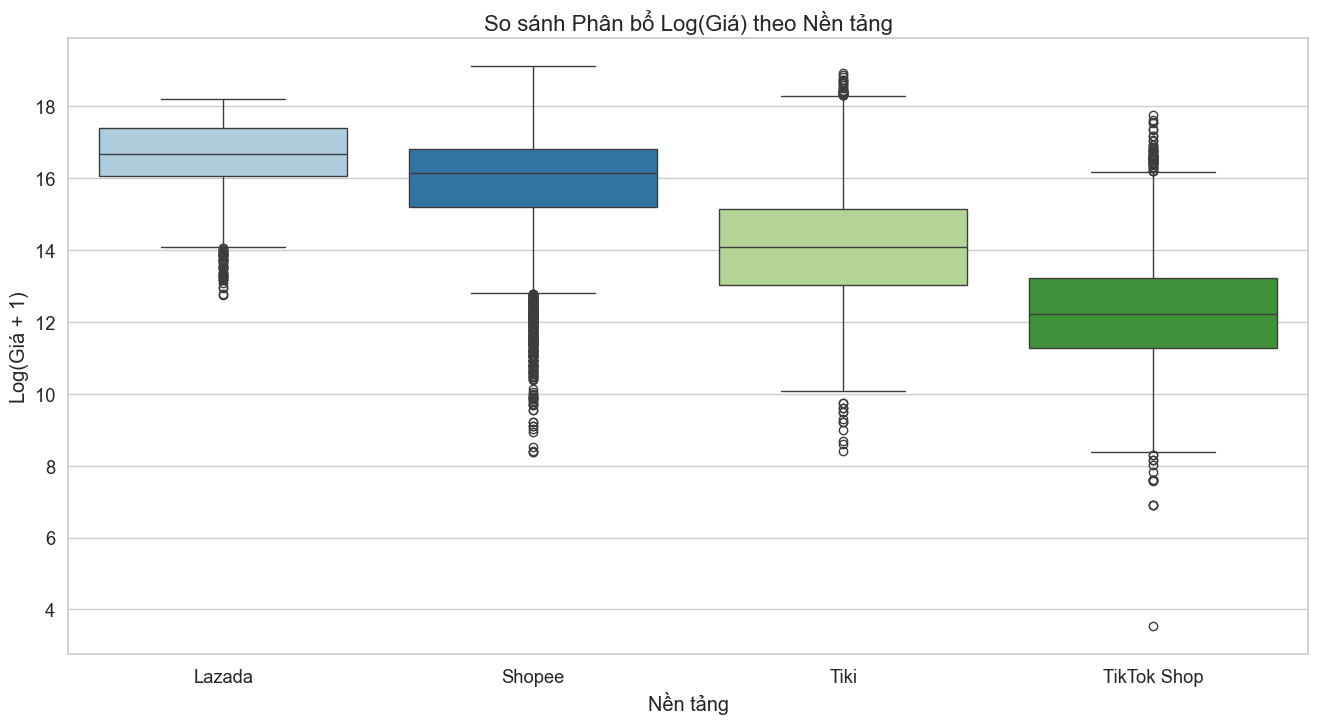

In [88]:
plt.figure(figsize=(16, 8))
# Sử dụng 'log_price' để so sánh dễ dàng hơn do chênh lệch giá lớn
sns.boxplot(data=df, x='platform', y='log_price', palette='Paired')
plt.title('So sánh Phân bổ Log(Giá) theo Nền tảng', fontsize=16)
plt.xlabel('Nền tảng')
plt.ylabel('Log(Giá + 1)')
plt.show()

### **4.2. So sánh Lượt bán (Sold) trung bình**

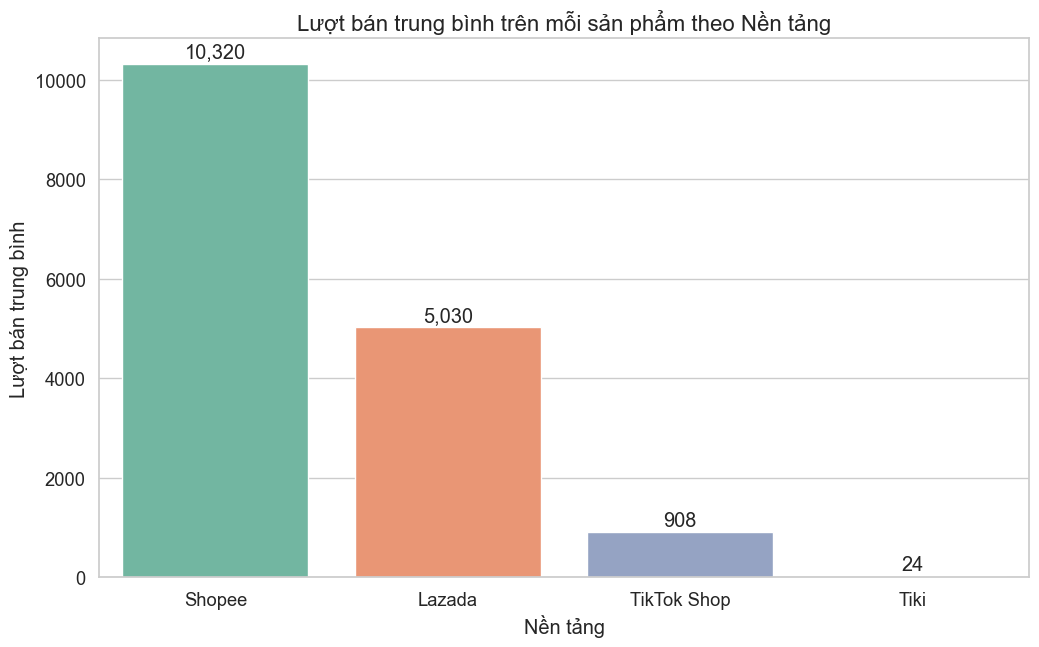

In [93]:
avg_sold_by_platform = df.groupby('platform')['sold'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_sold_by_platform.index, y=avg_sold_by_platform.values, palette='Set2')
plt.title('Lượt bán trung bình trên mỗi sản phẩm theo Nền tảng', fontsize=16)
plt.xlabel('Nền tảng')
plt.ylabel('Lượt bán trung bình')

# Thêm nhãn số lượng trên mỗi cột
for i, v in enumerate(avg_sold_by_platform.values):
    plt.text(i, v + 50, f'{v:,.0f}', ha='center', va='bottom')

plt.show()

### **4.3. So sánh Rating trung bình**

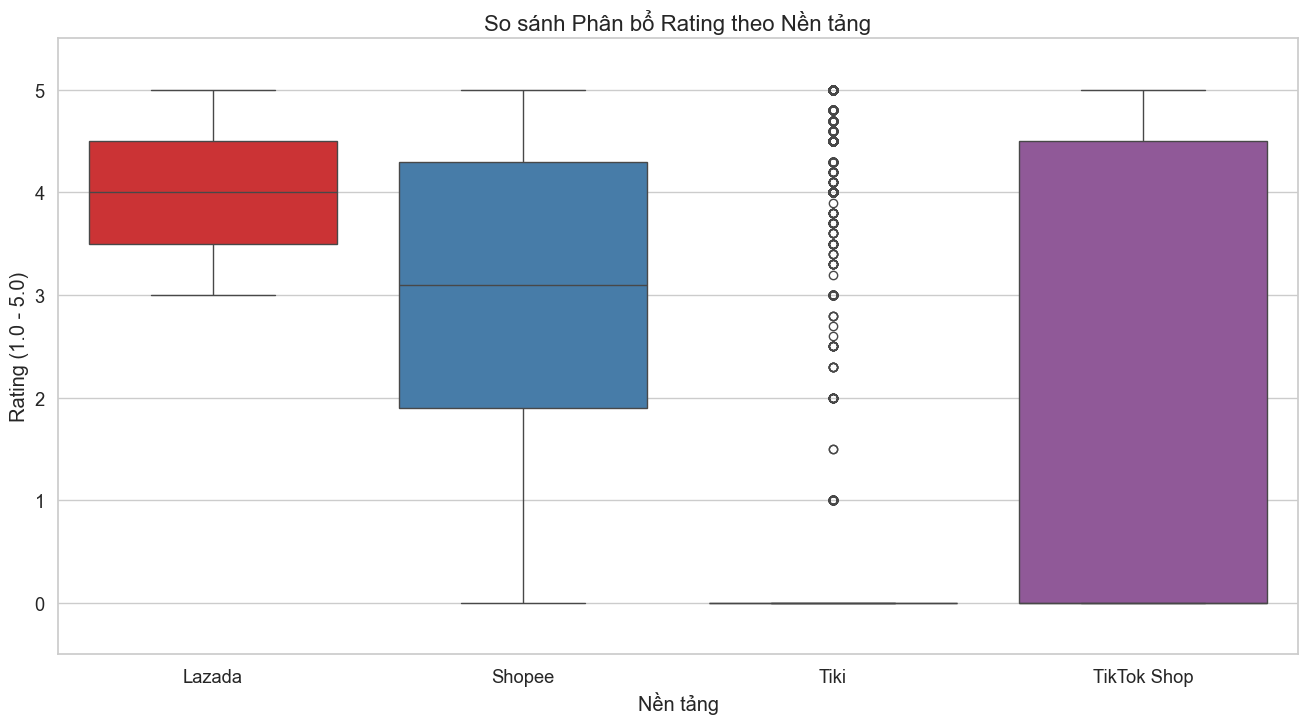

In [96]:
plt.figure(figsize=(16, 8))
# Sử dụng boxplot để xem cả phân bổ
sns.boxplot(data=df, x='platform', y='rating', palette='Set1')
plt.title('So sánh Phân bổ Rating theo Nền tảng', fontsize=16)
plt.xlabel('Nền tảng')
plt.ylabel('Rating (1.0 - 5.0)')
plt.ylim(-0.5, 5.5) # Giới hạn trục y để xem rõ hơn
plt.show()

### **4.4. Giá, Lượt bán, Rating trung bình theo Danh mục (Super Category)**

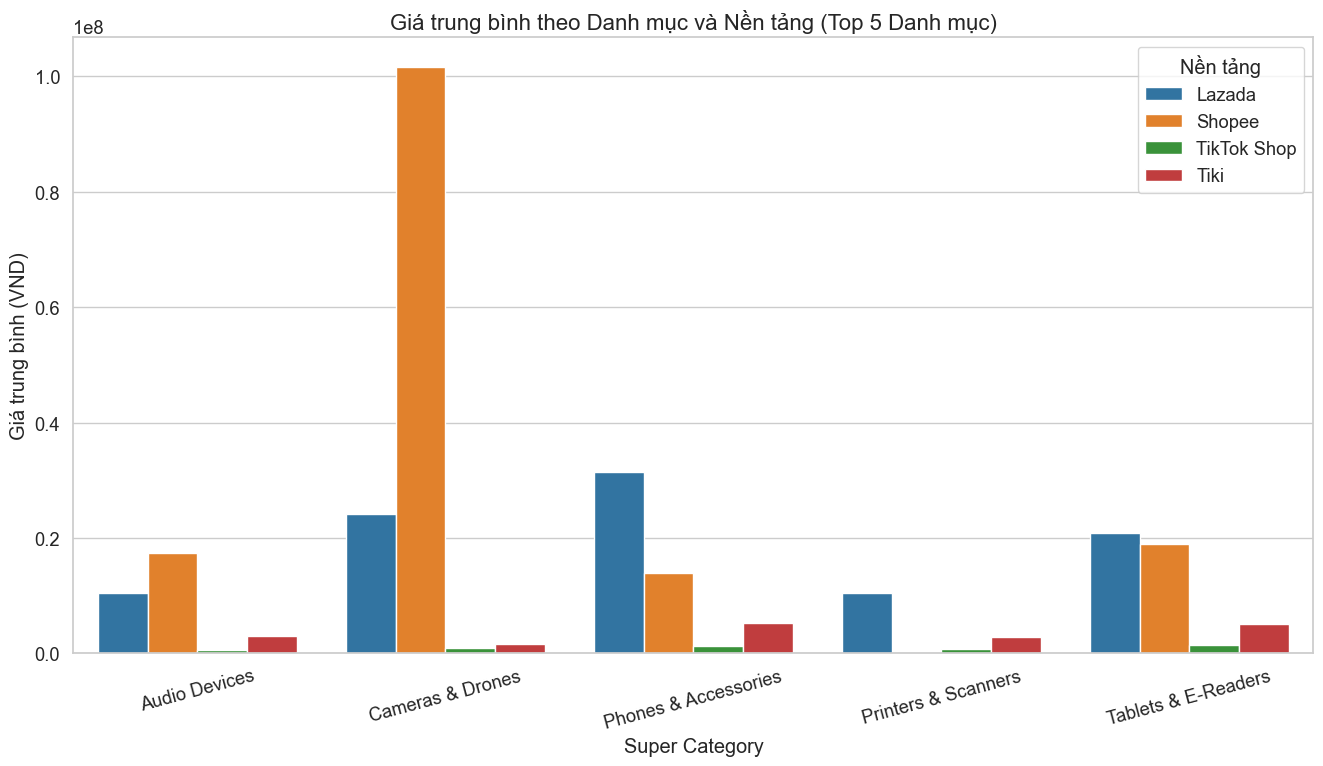

In [97]:
# Tính toán các giá trị trung bình
pivot_table = df.groupby(['super_category', 'platform']).agg(
    mean_price=('price', 'mean'),
    mean_sold=('sold', 'mean'),
    mean_rating=('rating', 'mean'),
    product_count=('sku', 'count')
).reset_index()

# Lọc ra top 5 danh mục có nhiều sản phẩm nhất để so sánh
top_5_cats = df['super_category'].value_counts().nlargest(5).index
df_top5_cats = pivot_table[pivot_table['super_category'].isin(top_5_cats)]

# Trực quan hóa Giá trung bình cho top 5 danh mục
plt.figure(figsize=(16, 8))
sns.barplot(data=df_top5_cats, x='super_category', y='mean_price', hue='platform', palette='tab10')
plt.title('Giá trung bình theo Danh mục và Nền tảng (Top 5 Danh mục)', fontsize=16)
plt.xlabel('Super Category')
plt.ylabel('Giá trung bình (VND)')
plt.xticks(rotation=15)
plt.legend(title='Nền tảng')
plt.show()

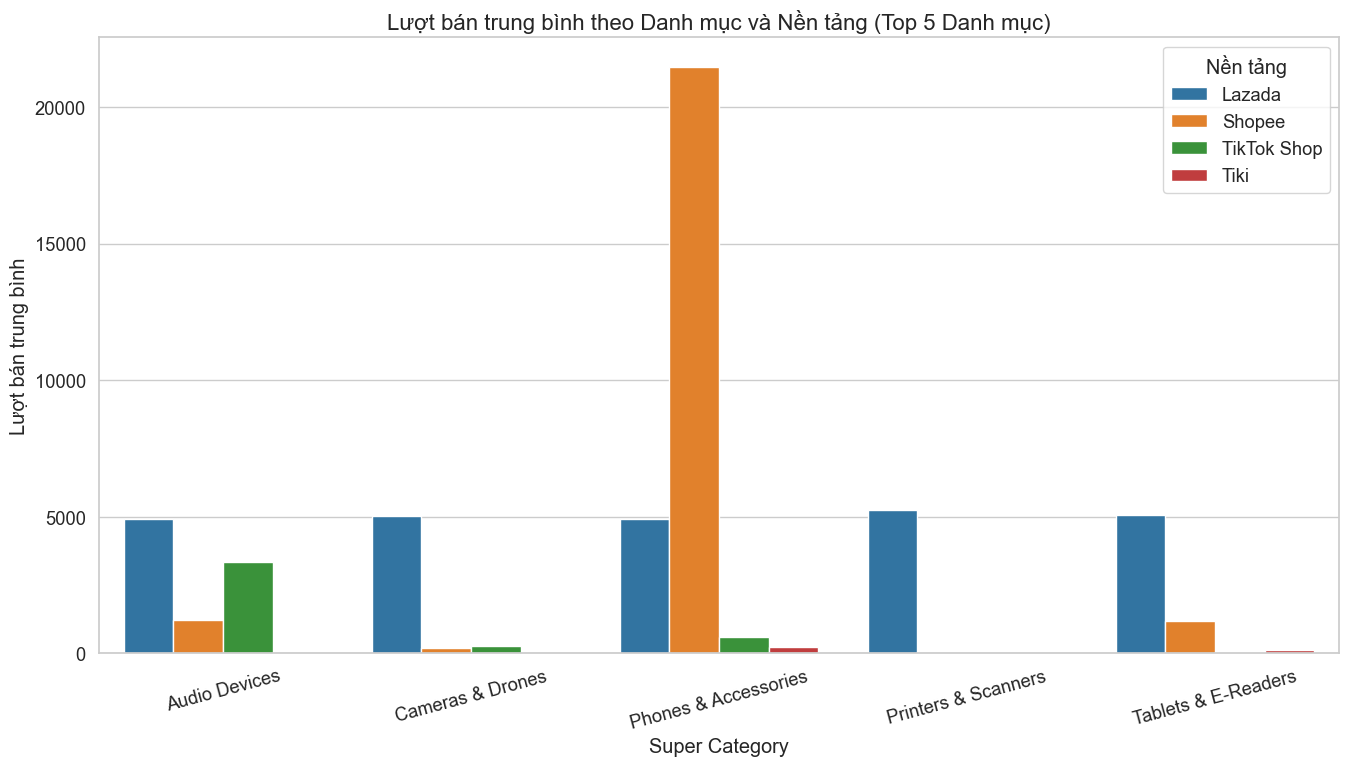

In [98]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df_top5_cats, x='super_category', y='mean_sold', hue='platform', palette='tab10')
plt.title('Lượt bán trung bình theo Danh mục và Nền tảng (Top 5 Danh mục)', fontsize=16)
plt.xlabel('Super Category')
plt.ylabel('Lượt bán trung bình')
plt.xticks(rotation=15)
plt.legend(title='Nền tảng')
plt.show()

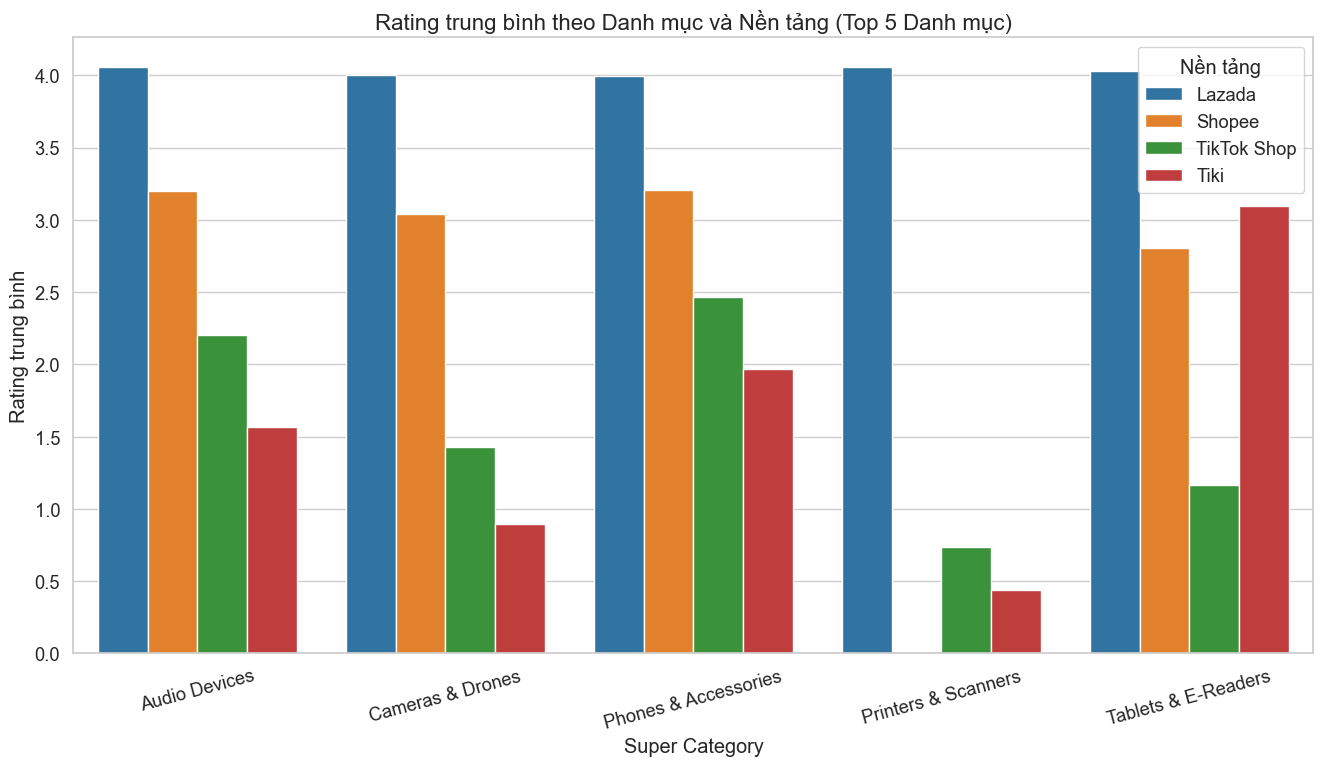

In [99]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df_top5_cats, x='super_category', y='mean_rating', hue='platform', palette='tab10')
plt.title('Rating trung bình theo Danh mục và Nền tảng (Top 5 Danh mục)', fontsize=16)
plt.xlabel('Super Category')
plt.ylabel('Rating trung bình')
plt.xticks(rotation=15)
plt.legend(title='Nền tảng')
plt.show()

Barplot rating trung bình theo super_category và platform cho thấy có sự khác biệt giữa các nền tảng trong cùng danh mục — nhưng mức chênh thường không quá lớn ở nhiều danh mục. Một vài nền tảng/nhóm sản phẩm có rating trung bình cao hơn hẳn, cho thấy chất lượng dịch vụ/sản phẩm hoặc chính sách review khác nhau giữa nền tảng.


- Sự khác biệt nhỏ cho thấy rating không hoàn toàn do danh mục mà còn do hành vi người dùng, chính sách đánh giá và cơ chế hiển thị review trên nền tảng.

- Các danh mục có rating thấp hơn có thể cần cải thiện trải nghiệm sản phẩm, dịch vụ khách hàng hoặc kiểm tra việc tồn tại lượng review giả/tiêu cực.

Khuyến nghị

- Phân tích sâu vào danh mục/nền tảng có rating thấp: xem xét tỷ lệ review tiêu cực, thời gian giao hàng, tỉ lệ trả hàng.

- Nếu so sánh performance bán hàng, dùng thêm metric khác (conversion, sold/visits) để quyết định chiến lược.

---

## **5. Tổng kết và Kết luận**

#### **1. Tổng quan dữ liệu**

Bộ dữ liệu phản ánh các sản phẩm điện tử từ nhiều **nền tảng thương mại điện tử khác nhau**, bao gồm thông tin như giá (`price`), lượt bán (`sold`), số lượng đánh giá (`review_count`), điểm đánh giá (`rating`), danh mục (`super_category` và `category`), và thương hiệu (`brand`).
Cấu trúc dữ liệu tương đối đầy đủ, với chỉ một số cột thiếu dữ liệu không đáng kể (như `sku` thiếu ~25%).
Quy mô mẫu đủ lớn, đảm bảo độ tin cậy cho các phân tích khám phá (EDA).

#### **2. Đặc điểm phân phối dữ liệu**

Các biến định lượng như `sold`, `review_count`, và `price` đều có **phân phối lệch phải (right-skewed)** rất mạnh:

* `sold`: trung bình ≈ **3,512** nhưng trung vị chỉ ≈ **18**, nghĩa là đa số sản phẩm bán ít, chỉ một số ít sản phẩm “hit” kéo trung bình lên cao.
* `review_count`: trung bình ≈ **1,095**, trung vị ≈ **3** — hành vi tương tự như `sold`.
* `price`: trung bình ≈ **10,5 triệu VND**, trung vị ≈ **3,1 triệu VND** — thể hiện sự tồn tại của một nhóm nhỏ sản phẩm cao cấp có giá rất cao.

Điều này cho thấy **sự chênh lệch cực lớn giữa nhóm sản phẩm phổ thông và nhóm nổi bật**, đặc trưng phổ biến của dữ liệu thương mại điện tử (hiệu ứng “long tail”).

Do đó, các phép thống kê và mô hình hóa cần **biến đổi log (log-transform)** hoặc loại bỏ ngoại lệ (outlier trimming) để giảm ảnh hưởng của các giá trị cực trị.

#### **3. Phân tích theo danh mục và nền tảng**

##### **3.1 Phân bổ danh mục (`super_category`)**

Một số danh mục chiếm phần lớn số lượng sản phẩm — điều này cho thấy **thị trường tập trung mạnh vào một vài nhóm sản phẩm chính** (thường là phụ kiện, điện thoại, laptop, hoặc thiết bị gia dụng thông minh).
Các danh mục nhỏ hơn có thể phản ánh **thị trường ngách** với cạnh tranh thấp hơn nhưng biên lợi nhuận cao hơn.

##### **3.2 So sánh giữa các nền tảng (`platform`)**

* Số lượng sản phẩm giữa các nền tảng **không đồng đều** — một vài nền tảng chiếm tỷ trọng lớn trong toàn bộ dataset.
* Khi so sánh hiệu suất (sold trung bình, rating, price), cần **chuẩn hóa hoặc so sánh trong cùng danh mục** để tránh sai lệch do quy mô nền tảng.
* Một số nền tảng có **giá trung bình thấp hơn nhưng lượt bán cao hơn**, ngụ ý chiến lược cạnh tranh giá hoặc tập trung phân khúc phổ thông.
* Các nền tảng khác duy trì **giá cao và rating cao hơn**, phản ánh phân khúc cao cấp và chính sách kiểm soát sản phẩm chặt chẽ hơn.

#### **4. Phân tích mối quan hệ giữa các biến**

##### **4.1 Tương quan (Correlation Analysis)**

* `sold` và `review_count` có **tương quan dương mạnh** → sản phẩm bán chạy thường nhận nhiều đánh giá hơn, xác nhận hành vi người dùng phổ biến.
* `price` và `sold` có **tương quan yếu hoặc âm nhẹ**, tức là sản phẩm giá cao có xu hướng bán ít hơn, nhưng mức độ thay đổi tùy thuộc danh mục.
* `rating` hầu như **không tương quan đáng kể với `sold`**: điểm đánh giá cao không đảm bảo doanh số cao — người tiêu dùng vẫn bị ảnh hưởng mạnh bởi giá và thương hiệu hơn là rating trung bình.

##### **4.2 Quan hệ giữa `price`, `sold` và `rating`**

* Khi xem xét theo log-scale:

  * Sản phẩm có giá thấp đến trung bình có biên độ bán rộng, cho thấy khả năng linh hoạt trong định giá.
  * Giá tăng cao quá mức khiến lượng bán giảm nhanh, trừ khi thuộc thương hiệu mạnh hoặc danh mục cao cấp.
* Rating cao có thể giúp cải thiện bán hàng trong khoảng giá trung bình, nhưng **không cứu được** sản phẩm định giá quá cao.

#### **5. Hiệu suất theo danh mục và nền tảng**

Phân tích top 5 danh mục cho thấy:

* **Giá trung bình**: chênh lệch đáng kể giữa nền tảng, phản ánh chiến lược định giá khác nhau.
* **Lượt bán trung bình**: có xu hướng cao nhất ở các nền tảng có chính sách khuyến mãi và phân phối rộng.
* **Rating trung bình**: đa phần tương đồng, chênh lệch nhỏ giữa nền tảng, cho thấy chất lượng sản phẩm được đánh giá khá đồng nhất trong từng danh mục.

**Kết luận phần này:**
Hiệu suất giữa các nền tảng có thể khác nhau do đặc điểm người dùng, chính sách review, hoặc nhóm sản phẩm chủ lực khác biệt. Vì vậy, **nên so sánh ở cấp danh mục và có chuẩn hóa theo quy mô danh mục** để phản ánh công bằng hơn.

#### **6. Nhận xét về chất lượng dữ liệu**

* `rating = 0` gần như luôn đi kèm `review_count = 0`, xác nhận đây là placeholder cho sản phẩm chưa có đánh giá.
* Một số giá trị giá (`price`) cực cao có thể là lỗi nhập liệu hoặc sai đơn vị → cần rà soát thêm.
* Các cột định tính (`platform`, `brand`, `super_category`) nhất quán và có thể dùng để tạo biến phân loại trong mô hình dự đoán.

#### **7. Định hướng và khuyến nghị**
##### **Phân tích mở rộng**

1. **Chuẩn bị dữ liệu cho modeling:**

   * Loại bỏ/ghi nhãn outliers, xử lý missing values (`sku`),
   * Tạo các biến log-transform (`log_price`, `log_sold`, `log_review_count`),
   * Mã hóa biến phân loại (One-hot encoding cho `platform` và `super_category`).

2. **Phân tích sâu theo nhóm:**

   * So sánh hiệu suất trong từng danh mục, từng thương hiệu.
   * Phân tích ảnh hưởng của giá đến lượt bán trong từng danh mục (price elasticity).

3. **Mô hình hóa (Predictive Modelling):**

   * Dự đoán `log(sold)` sử dụng các biến: `log_price`, `rating`, `review_count`, `platform`, `super_category`.
   * Dùng mô hình hồi quy hoặc tree-based (RandomForest, XGBoost).
   * Đánh giá bằng **R²**, **RMSE** trên thang log, và **feature importance** để xác định yếu tố ảnh hưởng mạnh nhất đến doanh số.

4. **Kiểm định thống kê:**

   * **ANOVA hoặc Kruskal–Wallis test** để xem khác biệt `rating` giữa các nền tảng.
   * **Spearman rank correlation** cho các mối quan hệ không tuyến tính giữa `price`, `sold`, `rating`.

### **8. Tổng kết chung**

> **Tóm lại:**
> Dữ liệu đa nền tảng về sản phẩm điện tử thể hiện rõ **hiệu ứng long-tail** trong doanh số, **sự chênh lệch mạnh về phân khúc giá**, và **sự khác biệt giữa nền tảng trong chiến lược định vị sản phẩm**.
> Rating và review là yếu tố phản ánh chất lượng cảm nhận, nhưng **không phải yếu tố quyết định chính doanh số** — giá, danh mục, và quy mô nền tảng đóng vai trò lớn hơn.
> Bộ dữ liệu này có tiềm năng cao để phát triển các mô hình dự đoán hoặc phân khúc sản phẩm theo hiệu suất bán hàng.
